In [1]:
import pandas as pd
%pylab inline
star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [2]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])==True]

In [3]:
yes_no = {
    "Yes": True,
    "No": False
}


In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [5]:
saw_i = {
    "Star Wars: Episode I  The Phantom Menace": True,
    NaN: False
}
saw_ii = {
    "Star Wars: Episode II  Attack of the Clones": True,
    NaN: False
}
saw_iii = {
    "Star Wars: Episode III  Revenge of the Sith": True,
    NaN: False
}
saw_iv = {
    "Star Wars: Episode IV  A New Hope": True,
    NaN: False
}
saw_v = {
    "Star Wars: Episode V The Empire Strikes Back": True,
    NaN: False
}
saw_vi = {
    "Star Wars: Episode VI Return of the Jedi": True,
    NaN: False
}


In [6]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.']=star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(saw_i)
star_wars['Unnamed: 4']=star_wars['Unnamed: 4'].map(saw_ii)
star_wars['Unnamed: 5']=star_wars['Unnamed: 5'].map(saw_iii)
star_wars['Unnamed: 6']=star_wars['Unnamed: 6'].map(saw_iv)
star_wars['Unnamed: 7']=star_wars['Unnamed: 7'].map(saw_v)
star_wars['Unnamed: 8']=star_wars['Unnamed: 8'].map(saw_vi)

In [7]:
print(star_wars.head(10))

    RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1   3.292880e+09                                               True             
2   3.292880e+09                                              False             
3   3.292765e+09                                               True             
4   3.292763e+09                                               True             
5   3.292731e+09                                               True             
6   3.292719e+09                                               True             
7   3.292685e+09                                               True             
8   3.292664e+09                                               True             
9   3.292654e+09                                               True             
10  3.292640e+09                                               True             

   Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                               

In [7]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
})

In [9]:
print(star_wars.head(10))

    RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1   3.292880e+09                                               True             
2   3.292880e+09                                              False             
3   3.292765e+09                                               True             
4   3.292763e+09                                               True             
5   3.292731e+09                                               True             
6   3.292719e+09                                               True             
7   3.292685e+09                                               True             
8   3.292664e+09                                               True             
9   3.292654e+09                                               True             
10  3.292640e+09                                               True             

   Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                               

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
star_wars=star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
        "Unnamed: 10":"ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
    })

In [12]:
print(star_wars.head(10))

    RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1   3.292880e+09                                               True             
2   3.292880e+09                                              False             
3   3.292765e+09                                               True             
4   3.292763e+09                                               True             
5   3.292731e+09                                               True             
6   3.292719e+09                                               True             
7   3.292685e+09                                               True             
8   3.292664e+09                                               True             
9   3.292654e+09                                               True             
10  3.292640e+09                                               True             

   Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                               

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
rank_means = star_wars[star_wars.columns[9:15]].apply(mean)
rank_stds = star_wars[star_wars.columns[9:15]].apply(std)
print(rank_means)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


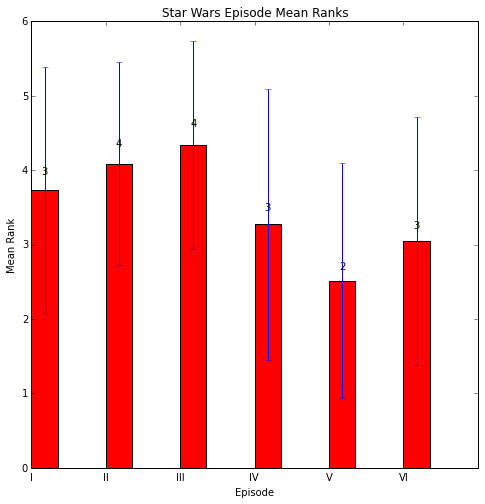

In [11]:
N = 6
ind = arange(N)
width=0.35
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
rect = ax.bar(ind,rank_means,width,color='r',yerr=rank_stds)
ax.set_xlabel("Episode")
ax.set_ylabel("Mean Rank")
ax.set_title("Star Wars Episode Mean Ranks")
ax.set_xticklabels(('I', 'II', 'III', 'IV', 'V','VI'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rect)
plt.show()

The plot shows that the people in the survey generally regard The Empire Strikes Back (V) as the best movie. The IV and VI episodes are also ranked around second and third best.

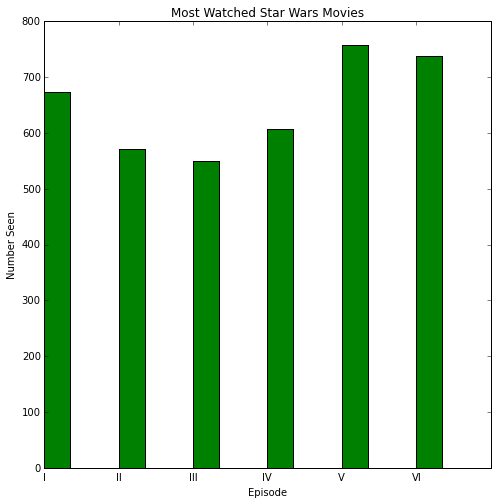

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


In [14]:
most_seen = star_wars[star_wars.columns[3:9]].apply(sum)

fig2 = plt.figure(figsize=(8,8))
ax1 = fig2.add_subplot(1,1,1)

rect2 = ax1.bar(ind,most_seen,width,color='g')
ax1.set_xticklabels(('I', 'II', 'III', 'IV', 'V','VI'))
ax1.set_xlabel("Episode")
ax1.set_ylabel("Number Seen")
ax1.set_title("Most Watched Star Wars Movies")

plt.show()
print(most_seen)

The Empire Strikes Back is also the most seen movie, with 758 of the surveyed having seen the movie. Next is Episode VI, then Episode I, then Episode IV. 
The highest ranking movie is the same as the highest watched movie, which may be directly correlated. No one can rank movies which they have not seen.

In [15]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [16]:
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

In [ ]:
N = 6
ind = arange(N)
width=0.35
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
rect = ax.bar(ind,rank_means,width,color='r',yerr=rank_stds)
ax.set_xlabel("Episode")
ax.set_ylabel("Mean Rank")
ax.set_title("Star Wars Episode Mean Ranks")
ax.set_xticklabels(('I', 'II', 'III', 'IV', 'V','VI'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rect)
plt.show()